# Titanic data set

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
test_x=test.drop('PassengerId',1)
train_x=train.drop('PassengerId',1)

In [4]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## The ticket column is probably not important. There is seemingly no patterns in there. We will drop this column.

In [5]:
train_x=train_x.drop(['Ticket'],1)
test_x=test_x.drop(['Ticket'],1)

In [6]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Let's see which columns have missing values.

In [7]:
print(train_x.isnull().sum() /train_x.shape[0])
print(test_x.isnull().sum() /test_x.shape[0])

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64


## Most of the cabin information is unknown. We could either choose to drop this column, or assume that people with Cabin = 'NaN' simply didn't have a cabin. We will go with this second assumption for now. For the age, we will replace the missing values with the median age.

In [8]:
median_age=np.median(train_x['Age'].dropna())
train_x['Age']=train_x['Age'].fillna(median_age)
median_age=np.median(test_x['Age'].dropna())
test_x['Age']=test_x['Age'].fillna(median_age)
train_x['Age'].head(5)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [9]:
train_x.loc[train_x['Cabin'].isnull(), 'Cabin'] = 0
train_x.loc[train_x['Cabin'] != 0, 'Cabin'] = 1
test_x.loc[test_x['Cabin'].isnull(), 'Cabin'] = 0
test_x.loc[test_x['Cabin'] != 0, 'Cabin'] = 1

## Let's see what we have so far

In [10]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S


## Does it matter where a passenger embarks from? Maybe. We will assign a numeric value to each of the Embarked zones.

In [11]:
train_x['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## First we will replace nan values with the max of (S, C, Q). Then we assign an int to each value.

In [12]:
print(train_x['Embarked'][train_x['Embarked']=='S'].count())
print(train_x['Embarked'][train_x['Embarked']=='C'].count())
print(train_x['Embarked'][train_x['Embarked']=='Q'].count())
train_x['Embarked']=train_x['Embarked'].fillna('S')
test_x['Embarked']=test_x['Embarked'].fillna('S')

644
168
77


In [13]:
train_x['Embarked']=train_x['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})
test_x['Embarked']=test_x['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})

In [14]:
#No more empty values
print(train_x.isnull().sum() /train_x.shape[0])
print(test_x.isnull().sum() /test_x.shape[0])

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Cabin       0.0
Embarked    0.0
dtype: float64
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Cabin       0.000000
Embarked    0.000000
dtype: float64


In [15]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0


## Replace male by 0 and female by 1. Alternatively we could one-hot encode these variables for better param learning.

In [16]:
train_x['Sex']=train_x['Sex'].replace('male',0)
train_x['Sex']=train_x['Sex'].replace('female',1)
test_x['Sex']=test_x['Sex'].replace('male',0)
test_x['Sex']=test_x['Sex'].replace('female',1)

In [17]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0


## Let's check how the indicators are linearly correlated with the survival.

In [18]:
train_x_copied = train_x.copy()
test_x_copied = test_x.copy()
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Embarked    0.106811
Fare        0.257307
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

## The sex, the fare, the class and the embarkment location seem to have some correlation with the survival rate. The others are not well correlated. Can we engineer better features?

## Let's see  how the fare price is distributed in order to bin the values.

In [19]:
print(train_x['Fare'].max())
print(train_x['Fare'].std())

train_x = train_x_copied.copy()
test_x =   test_x_copied.copy()

512.3292
49.693428597180905


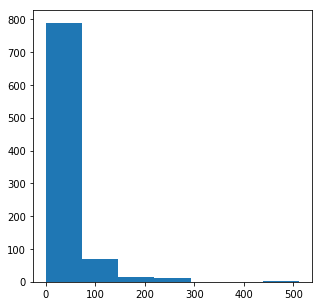

In [20]:
fig = plt.figure(figsize=(5,5))
ax1=fig.add_subplot(1,1,1)
values=ax1.hist(train_x['Fare'], bins=7)

In [21]:
values

(array([ 789.,   71.,   15.,   13.,    0.,    0.,    3.]),
 array([   0.        ,   73.18988571,  146.37977143,  219.56965714,
         292.75954286,  365.94942857,  439.13931429,  512.3292    ]),
 <a list of 7 Patch objects>)

## How would the correlation between fare and survival change if we bin this indicator?

In [22]:
for i in range(1,len(values[1])):
    train_x.loc[(train_x['Fare'] < values[1][i]) & (train_x['Fare'] >= values[1][i-1]),'Fare'] = i-1
    test_x.loc[(test_x['Fare'] < values[1][i]) & (test_x['Fare'] >= values[1][i-1]),'Fare'] = i-1
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Fare        0.077097
Parch       0.081629
Embarked    0.106811
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

## The linear correlation dropped from 0.25 to 0.10. We cannot say if this reduces the effectiveness of prediction simply because the linear correlation value dropped. It might actually help fight overfitting. We will test this in the prediction part.

In [23]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,0.0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,0.0,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,0.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0.0,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,0.0,0,0


## Let's see  how the fare price is distributed in order to bin the values.

In [24]:
print(train_x['Age'].max())
print(train_x['Age'].min())
print(train_x['Age'].std())

80.0
0.42
13.019696550973194


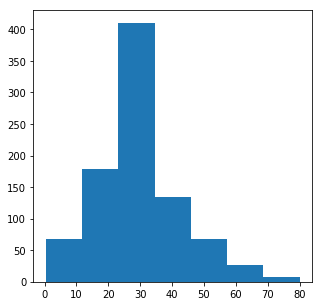

In [25]:
fig = plt.figure(figsize=(5,5))
ax1=fig.add_subplot(1,1,1)
values=ax1.hist(train_x['Age'], bins=7)

In [26]:
values

(array([  68.,  178.,  410.,  134.,   68.,   26.,    7.]),
 array([  0.42      ,  11.78857143,  23.15714286,  34.52571429,
         45.89428571,  57.26285714,  68.63142857,  80.        ]),
 <a list of 7 Patch objects>)

In [27]:
for i in range(1,len(values[1])):
    train_x.loc[(train_x['Age'] < values[1][i]) & (train_x['Age'] >= values[1][i-1]),'Age'] = i-1
    test_x.loc[(test_x['Age'] < values[1][i]) & (test_x['Age'] >= values[1][i-1]),'Age'] = i-1
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
SibSp      -0.035322
Age         0.018445
Fare        0.077097
Parch       0.081629
Embarked    0.106811
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

## The linear correlation changed from -0.06 to -0.03. We cannot say if this reduces the effectiveness of prediction simply because the linear correlation value dropped. It might actually help fight overfitting. We will test this in the prediction part.

In [28]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0.0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,0.0,1,1
2,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,0.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,0.0,1,0
4,0,3,"Allen, Mr. William Henry",0,3.0,0,0,0.0,0,0


# PREDICTIONS

In [29]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV as GS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

rfc = RFC()
scores = cross_val_score(rfc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
abc= ABC()
scores = cross_val_score(abc,train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
svc= SVC()
scores = cross_val_score(svc,train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Cross-validated scores: 0.793678924072
Cross-validated scores: 0.79350329134
Cross-validated scores: 0.826038474634


## RFC with grid search

In [30]:
parameters = {'n_estimators':(10,20,40,70),
                'criterion':("gini","entropy"),
              'max_depth':(None, 1, 2, 4, 6),
              'min_samples_split': (2, 3, 4)
              
             }

gs = GS(estimator=RFC(random_state=9999), param_grid=parameters,n_jobs=-1,verbose=True,cv=10)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 307 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 1185 out of 1200 | elapsed:   19.0s remaining:    0.1s


Best score: 0.834
Best parameters set:
	criterion: 'entropy'
	max_depth: 6
	min_samples_split: 3
	n_estimators: 40


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   19.2s finished


## Let's do some recursive feature elimination to see which features to remove

In [31]:
rfc=RFC(n_estimators=40, max_depth=4,min_samples_split=3,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.821594313926
Cross-validated scores without:  Pclass 0.819347122915
Cross-validated scores without:  Sex 0.725200034048
Cross-validated scores without:  Age 0.805925831347
Cross-validated scores without:  SibSp 0.82274287822
Cross-validated scores without:  Parch 0.821632050846
Cross-validated scores without:  Fare 0.824977584837
Cross-validated scores without:  Cabin 0.820457950289
Cross-validated scores without:  Embarked 0.812554761094


## Let's remove fare and redo the elimination

In [32]:
rfc=RFC(n_estimators=40, max_depth=4,min_samples_split=3,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name','Fare'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name','Fare'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.824977584837
Cross-validated scores without:  Pclass 0.820445465895
Cross-validated scores without:  Sex 0.715124560209
Cross-validated scores without:  Age 0.805901146294
Cross-validated scores without:  SibSp 0.81372886165
Cross-validated scores without:  Parch 0.821582113268
Cross-validated scores without:  Cabin 0.815938032005
Cross-validated scores without:  Embarked 0.801443649983


In [33]:
rfc=RFC(n_estimators=40, max_depth=4,min_samples_split=3,criterion='entropy',random_state=9999 )
rfc.fit(train_x.drop(['Survived','Name','Fare'],1), train_x['Survived'])
rfc.feature_importances_

array([ 0.16340072,  0.48395491,  0.06339524,  0.05528736,  0.05231016,
        0.12494959,  0.05670203])

## Results of RFC

### With age and fare binning, accuracy=  0.78468, and 0.78947 without fare
### Without age and fare binning, accuracy =  0.76076


## ABC with grid search

In [34]:
parameters = {
              'n_estimators':(50,10,20,30,100),
             'learning_rate':(1.0,0.2,0.5,0.9,0.4,2,4,5)
             }

gs = GS(estimator=ABC(random_state=9999), param_grid=parameters,n_jobs=-1,verbose=True,cv=10)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s


Best score: 0.820
Best parameters set:
	learning_rate: 1.0
	n_estimators: 10


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.2s finished


## Let's do some recursive feature elimination to see which features to remove

In [35]:
abc=ABC(n_estimators= 50, learning_rate=0.9,random_state=9999)
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(abc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(abc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.800283168766
Cross-validated scores without:  Pclass 0.79689876291
Cross-validated scores without:  Sex 0.716273975712
Cross-validated scores without:  Age 0.79803484281
Cross-validated scores without:  SibSp 0.794601634321
Cross-validated scores without:  Parch 0.791230847804
Cross-validated scores without:  Fare 0.79918454205
Cross-validated scores without:  Cabin 0.795838724322
Cross-validated scores without:  Embarked 0.796861309726


## There doesn't seem to be anything worth removing!

In [36]:
abc=ABC(n_estimators= 50, learning_rate=0.9,random_state=9999)
abc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
abc.feature_importances_

array([ 0.16,  0.08,  0.18,  0.08,  0.2 ,  0.22,  0.02,  0.06])

## Results of ABC

### With age and fare binning, accuracy=  0.74641
### Without age and fare binning, accuracy =  0.75119

## SVC with grid search

In [37]:
parameters = {
              'C':(0.001,0.01,0.1,1,10,20,50,100,1000),
             }

gs = GS(estimator=SVC(random_state=9999), param_grid=parameters,n_jobs=2,verbose=True,cv=3)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
      print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=2)]: Done  24 out of  27 | elapsed:    3.8s remaining:    0.4s
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    4.0s finished


Best score: 0.822
Best parameters set:
	C: 1


## Let's do some recursive feature elimination to see which features to remove

In [38]:
svc=SVC(random_state=9999, C=1)
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(svc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(svc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.826038474634
Cross-validated scores without:  Pclass 0.826076211554
Cross-validated scores without:  Sex 0.736373567132
Cross-validated scores without:  Age 0.803577630235
Cross-validated scores without:  SibSp 0.812554477358
Cross-validated scores without:  Parch 0.815887810691
Cross-validated scores without:  Fare 0.824940131654
Cross-validated scores without:  Cabin 0.826063727159
Cross-validated scores without:  Embarked 0.826051242765


In [39]:
svc=SVC(random_state=9999, C=1)
svc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=9999, shrinking=True,
  tol=0.001, verbose=False)

## Results of SVC

### With age and fare binning, accuracy=  0.78947
### Without age and fare binning, accuracy =  0.65071

Binning significantly affects SVM.

In [40]:
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].dropna().median())
res=rfc.predict(test_x.drop(['Name','Fare'],1))

In [41]:
n_points = res.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = test['PassengerId']
y_pred_pp[:, 1] = res
np.savetxt('rfc.csv', y_pred_pp, fmt='%d', delimiter=',',header="PassengerId,Survived",comments='')

## Does it matter if you're a lady or a duchess?

In [42]:
names = list(train_x['Name'])
names_test=list(test_x['Name'])

In [43]:
titles=[]
for name in names:
    tmp=name.split(',')
    tmp=tmp[1].split('.')
    titles.append(tmp[0].strip())
    
titles_test=[]
for name in names_test:
    tmp=name.split(',')
    tmp=tmp[1].split('.')
    titles_test .append(tmp[0].strip())    

In [44]:
train_x['Titles']=titles
test_x['Titles']=titles_test

In [45]:
print(train_x['Titles'].unique())
print(test_x['Titles'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [46]:
print(train_x['Titles'].loc[train_x['Titles']=='Mr'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Mrs'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Miss'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Master'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Don'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Rev'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Dr'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Mme'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Ms'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Major'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Lady'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Sir'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Mlle'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Col'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Capt'].count())
print(train_x['Titles'].loc[train_x['Titles']=='the Countess'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Jonkheer'].count())


517
125
182
40
1
6
7
1
1
2
1
1
2
2
1
1
1


## We will map Mme to Mrs, Ms and Mlle to Miss. Everything under the frequency of 10 will be mapped to a new value called others.

In [47]:
train_x['Titles']=train_x['Titles'].replace({'Mme': 'Mrs', 'Ms': 'Miss', 'Mlle':'Miss',
                                              'Don':'Other'
                                            , 'Rev':'Other'
                                             , 'Dr':'Other'
                                             , 'Major':'Other'
                                             , 'Lady':'Other'
                                             , 'Sir':'Other'
                                             , 'Col':'Other'
                                             , 'Capt':'Other'
                                             , 'the Countess':'Other'
                                             , 'Jonkheer':'Other'
                                            
                                            })


test_x['Titles']=test_x['Titles'].replace({'Mme': 'Mrs', 'Ms': 'Miss', 'Mlle':'Miss',
                                              'Dona':'Other'
                                            , 'Rev':'Other'
                                             , 'Dr':'Other'
                                             , 'Major':'Other'
                                             , 'Lady':'Other'
                                             , 'Sir':'Other'
                                             , 'Col':'Other'
                                             , 'Capt':'Other'
                                             , 'the Countess':'Other'
                                             , 'Jonkheer':'Other'
                                            
                                            })


print(train_x['Titles'].unique())
print(test_x['Titles'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


## Now we shall map these new values to ints

In [48]:
train_x['Titles']=train_x['Titles'].replace({'Mr':0, 'Mrs':1, 'Miss':2,'Master':3, 'Other':4
                                            
                                            })

test_x['Titles']=test_x['Titles'].replace({'Mr':0, 'Mrs':1, 'Miss':2,'Master':3, 'Other':4
                                            
                                            })



In [49]:
train_x.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Titles
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0.0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,0.0,1,1,1


# Here goes another round of predictions

In [50]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV as GS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

rfc = RFC(random_state=9999)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
abc= ABC(random_state=9999)
scores = cross_val_score(abc,train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
svc= SVC(random_state=9999)
scores = cross_val_score(svc,train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())

Cross-validated scores: 0.795838440586
Cross-validated scores: 0.818236579276
Cross-validated scores: 0.828273181251


## RFC with grid search

In [58]:
parameters = {'n_estimators':(10,20,40,70,100,150),
                'criterion':("gini","entropy"),
              'max_depth':(None, 1, 2, 4, 6),
              'min_samples_split': (2, 3, 4),
             }

gs = GS(estimator=RFC(random_state=9999), param_grid=parameters,n_jobs=4,verbose=True,cv=10)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 240 tasks      | elapsed:   19.5s
[Parallel(n_jobs=4)]: Done 740 tasks      | elapsed:   48.2s
[Parallel(n_jobs=4)]: Done 1440 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:  1.6min finished


Best score: 0.834
Best parameters set:
	criterion: 'entropy'
	max_depth: 6
	min_samples_split: 2
	n_estimators: 100


## Let's do some recursive feature elimination to see which features to remove

In [76]:
rfc=RFC(n_estimators=100, max_depth=6,min_samples_split=2,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=890)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=2)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

ValueError: All the n_labels for individual classes are less than 890 folds.

## Let's remove fare and redo the elimination

In [62]:
rfc=RFC(n_estimators=100, max_depth=6,min_samples_split=2,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name','Fare'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name','Fare'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.832768130746
Cross-validated scores without:  Pclass 0.831644251504
Cross-validated scores without:  Sex 0.822717909431
Cross-validated scores without:  Age 0.823841504937
Cross-validated scores without:  SibSp 0.816026273976
Cross-validated scores without:  Parch 0.827225059585
Cross-validated scores without:  Cabin 0.823866757462
Cross-validated scores without:  Embarked 0.823804051753
Cross-validated scores without:  Titles 0.821594313926


## Remove Sex

In [63]:
rfc=RFC(n_estimators=100, max_depth=6,min_samples_split=2,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name','Fare','Sex'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name','Fare','Sex'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.822717909431
Cross-validated scores without:  Pclass 0.827162353876
Cross-validated scores without:  Age 0.823841504937
Cross-validated scores without:  SibSp 0.817162637612
Cross-validated scores without:  Parch 0.830558109182
Cross-validated scores without:  Cabin 0.82269237317
Cross-validated scores without:  Embarked 0.821543808875
Cross-validated scores without:  Titles 0.719606174101


## Remove Parch

In [66]:
rfc=RFC(n_estimators=100, max_depth=6,min_samples_split=2,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name','Fare','Sex','Parch'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name','Fare','Sex','Parch'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.830558109182
Cross-validated scores without:  Pclass 0.817062194984
Cross-validated scores without:  Age 0.827225343321
Cross-validated scores without:  SibSp 0.814940699126
Cross-validated scores without:  Cabin 0.824977584837
Cross-validated scores without:  Embarked 0.819321870389
Cross-validated scores without:  Titles 0.696023152877


In [67]:
rfc=RFC(n_estimators=100, max_depth=6,min_samples_split=2,criterion='entropy',random_state=9999 )
rfc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
rfc.feature_importances_

array([ 0.14216104,  0.25442136,  0.07101758,  0.07289254,  0.04096279,
        0.03739912,  0.05995165,  0.0376799 ,  0.28351402])

## Results of RFC

### With age and fare binning, accuracy=  0.80382
### Without age and fare binning, accuracy = 


## SVC with grid search

In [197]:
parameters = {
              'C':(0.001,0.01,0.1,1,10,20,50,100,1000),
             }

gs = GS(estimator=SVC(random_state=9999), param_grid=parameters,n_jobs=2,verbose=True,cv=3)
gs.fit(train_x.drop(['Survived','Name','Parch'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
      print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best score: 0.832
Best parameters set:
	C: 10


[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    2.4s finished


## Feature elimination

In [165]:
svc=SVC(random_state=9999, C=10)
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(svc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(svc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.831644251504
Cross-validated scores without:  Pclass 0.827124616956
Cross-validated scores without:  Sex 0.823804051753
Cross-validated scores without:  Age 0.826076211554
Cross-validated scores without:  SibSp 0.812655487459
Cross-validated scores without:  Parch 0.828298433776
Cross-validated scores without:  Fare 0.821569345137
Cross-validated scores without:  Cabin 0.829409544887
Cross-validated scores without:  Embarked 0.815951367609
Cross-validated scores without:  Titles 0.826051242765


In [166]:
svc=SVC(random_state=9999, C=10)
svc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=9999, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].dropna().median())
res=rfc.predict(test_x.drop(['Name'],1))

In [69]:
n_points = res.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = test['PassengerId']
y_pred_pp[:, 1] = res
np.savetxt('rfc.csv', y_pred_pp, fmt='%d', delimiter=',',header="PassengerId,Survived",comments='')